# Linear Regression on properties dataset from Zillow

Here we have used some of the python libraries to predict future trends in the home value prediction. Some of those libraries include numpy, pandas, seaborn, matplotlib, keras, xgboost, lightgbm, sklearn

# Linear Regression

Linear regression is a common Statistical Data Analysis technique  
It is used to determine the extent to which there is a linear relationship between a dependent variable and one or more independent variables
### Linear Regression is of 2 types :
1) Simple linear regression 
2) Multiple linear regression

### Simple Linear Regression

In Simple linear regression a single independent variable is used to predict the value of a dependent variable

### Multiple Linear Regression

In  Multiple linear regression two or more independent variables are used to predict the value of a dependent variable

### The difference between the two is the number of independent variables. In both cases there is only a single dependent variable

### Correlation and Regression
Simple linear regression is similar to correlation in that the purpose is to measure to what extent there is a linear relationship between two variables. The major difference between the two is that correlation makes no distinction between independent and dependent variables while linear regression does. In particular, the purpose of linear regression is to "predict" the value of the dependent variable based upon the values of one or more independent variables

## Data Preprocessing and Exploratory Data Analysis(EDA)

### First we have imported various libraries so that we can use it for preprocessing the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Here we have used Zillow Home Value Prediction properties2017 dataset. In this dataset we have various features like the bedroom count, bathroom count, tax amount,etc which can an important part of our analysis

In [2]:
project = pd.read_csv("properties_2017.csv",low_memory = False)

### Displaying the null values in the dataset. These null values need to filled with some appropriate value or should be dropped if they are irrelevant. This is an important step as a part of carrying out futher analysis and make the data completely ready for analysis.

In [3]:
project.isnull().sum()

parcelid                              0
airconditioningtypeid           2169855
architecturalstyletypeid        2979156
basementsqft                    2983590
bathroomcnt                        2957
bedroomcnt                         2945
buildingclasstypeid             2972486
buildingqualitytypeid           1043822
calculatedbathnbr                117156
decktypeid                      2967838
finishedfloor1squarefeet        2781459
calculatedfinishedsquarefeet      45097
finishedsquarefeet12             264431
finishedsquarefeet13            2977546
finishedsquarefeet15            2795032
finishedsquarefeet50            2781459
finishedsquarefeet6             2963735
fips                               2932
fireplacecnt                    2672093
fullbathcnt                      117156
garagecarcnt                    2094209
garagetotalsqft                 2094209
hashottuborspa                  2935155
heatingorsystemtypeid           1116053
latitude                           2932


### Step Below drops the columns with maximum null values from the dataset, as these values are not important(since it has many unwanted values) and will impact the overall prediction of future house prices.

In [4]:
to_drop = ['taxdelinquencyyear',
           'taxdelinquencyflag',
           'fireplaceflag',
           'numberofstories',
           'yardbuildingsqft26',
           'yardbuildingsqft17',
           'typeconstructiontypeid',
           'threequarterbathnbr',
          'storytypeid',
          'regionidneighborhood',
          'pooltypeid7',
           'pooltypeid2',
           'pooltypeid10',
           'poolsizesum',
           'poolcnt',
           'hashottuborspa','garagetotalsqft',
           'garagecarcnt',
           'fireplacecnt',
           'finishedsquarefeet6',
           'finishedsquarefeet50',
           'finishedsquarefeet15',
           'finishedsquarefeet13',
           'finishedfloor1squarefeet',
           'decktypeid',
           'buildingqualitytypeid',
           'basementsqft',
           'architecturalstyletypeid',
           'airconditioningtypeid'
          ]

project.drop(to_drop, inplace = True, axis = 1)
project.head()

,parcelid,bathroomcnt,bedroomcnt,buildingclasstypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,96337.0,0.0,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,96337.0,0.0,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,0.0,0.0,5.0,NaN,73026.0,NaN,6037.0,NaN,NaN,...,96095.0,0.0,2.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,10859147,0.0,0.0,3.0,NaN,5068.0,NaN,6037.0,NaN,NaN,...,96424.0,0.0,NaN,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,10879947,0.0,0.0,4.0,NaN,1776.0,NaN,6037.0,NaN,NaN,...,96450.0,0.0,1.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN


In [7]:
todrop = ['buildingclasstypeid',
           'heatingorsystemtypeid',
           'propertyzoningdesc',
           'unitcnt'
          ]

project.drop(todrop, inplace = True, axis = 1)

#Displaying the first 5 rows of the updated dataset

project.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34144442.0,-118654084.0,...,3101.0,96337.0,0.0,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34140430.0,-118625364.0,...,3101.0,96337.0,0.0,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,0.0,0.0,NaN,73026.0,NaN,6037.0,NaN,33989359.0,-118394633.0,...,3101.0,96095.0,0.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,10859147,0.0,0.0,NaN,5068.0,NaN,6037.0,NaN,34148863.0,-118437206.0,...,3101.0,96424.0,0.0,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,10879947,0.0,0.0,NaN,1776.0,NaN,6037.0,NaN,34194168.0,-118385816.0,...,3101.0,96450.0,0.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN


### describe() function gives us the mean and minimum, count,also provides us with the mean and std values and also various set of values ranging from 25%,50% and 75%

In [11]:
project.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
count,2.985217e+06,2.982260e+06,2.982272e+06,2.868061e+06,2.940120e+06,2.720786e+06,2.982285e+06,2.868061e+06,2.982285e+06,2.982285e+06,...,2.982285e+06,2.972503e+06,2.982248e+06,2.937384e+06,2.938753e+06,2.950951e+06,2.982284e+06,2.925291e+06,2.962465e+06,2.910232e+06
mean,1.332586e+07,2.216196e+00,3.093362e+00,2.303826e+00,1.831455e+03,1.764045e+03,6.048053e+03,2.248089e+00,3.400131e+07,-1.182017e+08,...,2.569085e+03,9.655329e+04,1.474357e+00,1.964438e+03,1.781429e+05,4.435279e+05,2.015998e+03,2.684558e+05,5.408949e+03,6.048434e+13
std,7.909966e+06,1.078250e+00,1.271569e+00,1.003243e+00,1.954198e+03,1.031383e+03,2.024082e+01,9.929959e-01,2.435157e+05,3.455918e+05,...,7.886840e+02,3.680815e+03,2.839869e+00,2.364428e+01,4.600503e+05,8.163366e+05,6.039949e-02,4.865097e+05,9.675567e+03,3.249133e+11
min,1.071172e+07,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.037000e+03,1.000000e+00,3.332439e+07,-1.194758e+08,...,1.286000e+03,9.598200e+04,0.000000e+00,1.801000e+03,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,2.400000e-01,-1.000000e+00
25%,1.164371e+07,2.000000e+00,2.000000e+00,2.000000e+00,1.215000e+03,1.198000e+03,6.037000e+03,2.000000e+00,3.382740e+07,-1.183929e+08,...,1.286000e+03,9.618000e+04,0.000000e+00,1.950000e+03,7.766600e+04,1.882200e+05,2.016000e+03,7.970000e+04,2.468620e+03,6.037400e+13
50%,1.254509e+07,2.000000e+00,3.000000e+00,2.000000e+00,1.574000e+03,1.542000e+03,6.037000e+03,2.000000e+00,3.400807e+07,-1.181721e+08,...,3.101000e+03,9.637700e+04,0.000000e+00,1.963000e+03,1.270660e+05,3.211610e+05,2.016000e+03,1.766190e+05,4.007620e+03,6.037572e+13
75%,1.409712e+07,3.000000e+00,4.000000e+00,3.000000e+00,2.140000e+03,2.075000e+03,6.059000e+03,3.000000e+00,3.416186e+07,-1.179489e+08,...,3.101000e+03,9.697400e+04,0.000000e+00,1.981000e+03,2.040000e+05,5.140720e+05,2.016000e+03,3.261000e+05,6.230500e+03,6.059042e+13
max,1.696019e+08,3.200000e+01,2.500000e+01,3.200000e+01,9.525760e+05,4.270790e+05,6.111000e+03,3.200000e+01,3.481965e+07,-1.175543e+08,...,3.101000e+03,3.996750e+05,9.600000e+01,2.016000e+03,2.553212e+08,3.196225e+08,2.016000e+03,9.401108e+07,3.823176e+06,4.830301e+14


### corr() function from pandas library of python or heatmap() function from seaborn library of python help us to identify the columns with maximum correlation and also allows us to decide and think logically which are the features that can be used based on the correlation.

In [12]:
project.corr()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
parcelid,1.000000,-0.023658,-0.045339,0.025915,0.012769,0.023845,0.200898,0.004203,-0.069114,-0.005632,...,-0.165032,0.049956,0.123396,0.126011,0.025871,0.025712,-0.133237,0.025879,0.023869,0.455910
bathroomcnt,-0.023658,1.000000,0.699411,1.000000,0.328405,0.700489,-0.015292,0.987275,0.010073,-0.006156,...,-0.004188,0.017594,0.061458,0.332190,0.250899,0.307743,0.019234,0.275638,0.304536,-0.015826
bedroomcnt,-0.045339,0.699411,1.000000,0.629650,0.242668,0.543026,-0.008866,0.627435,0.027142,0.010854,...,0.014261,0.007697,0.162143,0.048354,0.116213,0.138356,0.023767,0.112545,0.144009,-0.012018
calculatedbathnbr,0.025915,1.000000,0.629650,1.000000,0.678733,0.791140,0.022384,0.987275,0.011536,-0.020540,...,-0.036673,0.022963,0.023059,0.367604,0.565642,0.457812,-0.005784,0.339888,0.463126,0.013248
calculatedfinishedsquarefeet,0.012769,0.328405,0.242668,0.678733,1.000000,1.000000,0.015028,0.663739,-0.003851,-0.007958,...,-0.024339,0.014539,0.033519,0.109696,0.656635,0.559505,-0.008249,0.327697,0.575270,0.018939
finishedsquarefeet12,0.023845,0.700489,0.543026,0.791140,1.000000,1.000000,0.066925,0.771860,-0.006488,-0.011484,...,-0.085545,0.034107,0.099499,0.256333,0.688438,0.575814,-0.009753,0.434983,0.582915,0.043555
fips,0.200898,-0.015292,-0.008866,0.022384,0.015028,0.066925,1.000000,-0.039134,-0.042842,-0.357309,...,-0.618903,0.056454,0.689719,0.251975,0.008537,-0.000360,0.002539,-0.004292,-0.015167,0.618367
fullbathcnt,0.004203,0.987275,0.627435,0.987275,0.663739,0.771860,-0.039134,1.000000,0.055623,-0.044681,...,0.044195,0.017433,-0.026851,0.325020,0.550507,0.444294,-0.006462,0.329067,0.452208,-0.023781
latitude,-0.069114,0.010073,0.027142,0.011536,-0.003851,-0.006488,-0.042842,0.055623,1.000000,-0.581006,...,0.570470,0.000977,-0.231935,-0.007796,0.003356,-0.056682,-0.005220,-0.102245,-0.040106,-0.023405
longitude,-0.005632,-0.006156,0.010854,-0.020540,-0.007958,-0.011484,-0.357309,-0.044681,-0.581006,1.000000,...,-0.365892,0.031640,-0.020700,0.062877,-0.029767,-0.020341,0.005313,-0.005030,-0.024091,-0.222520


### Below countplot show the range of bathroom and fractional bathroom counts which Zillow offers to its customers according to finished square feet area

### From the below countplot we can also conclude that most of the Zillow's customer enjoy have 3 or less bathrooms in there apartments

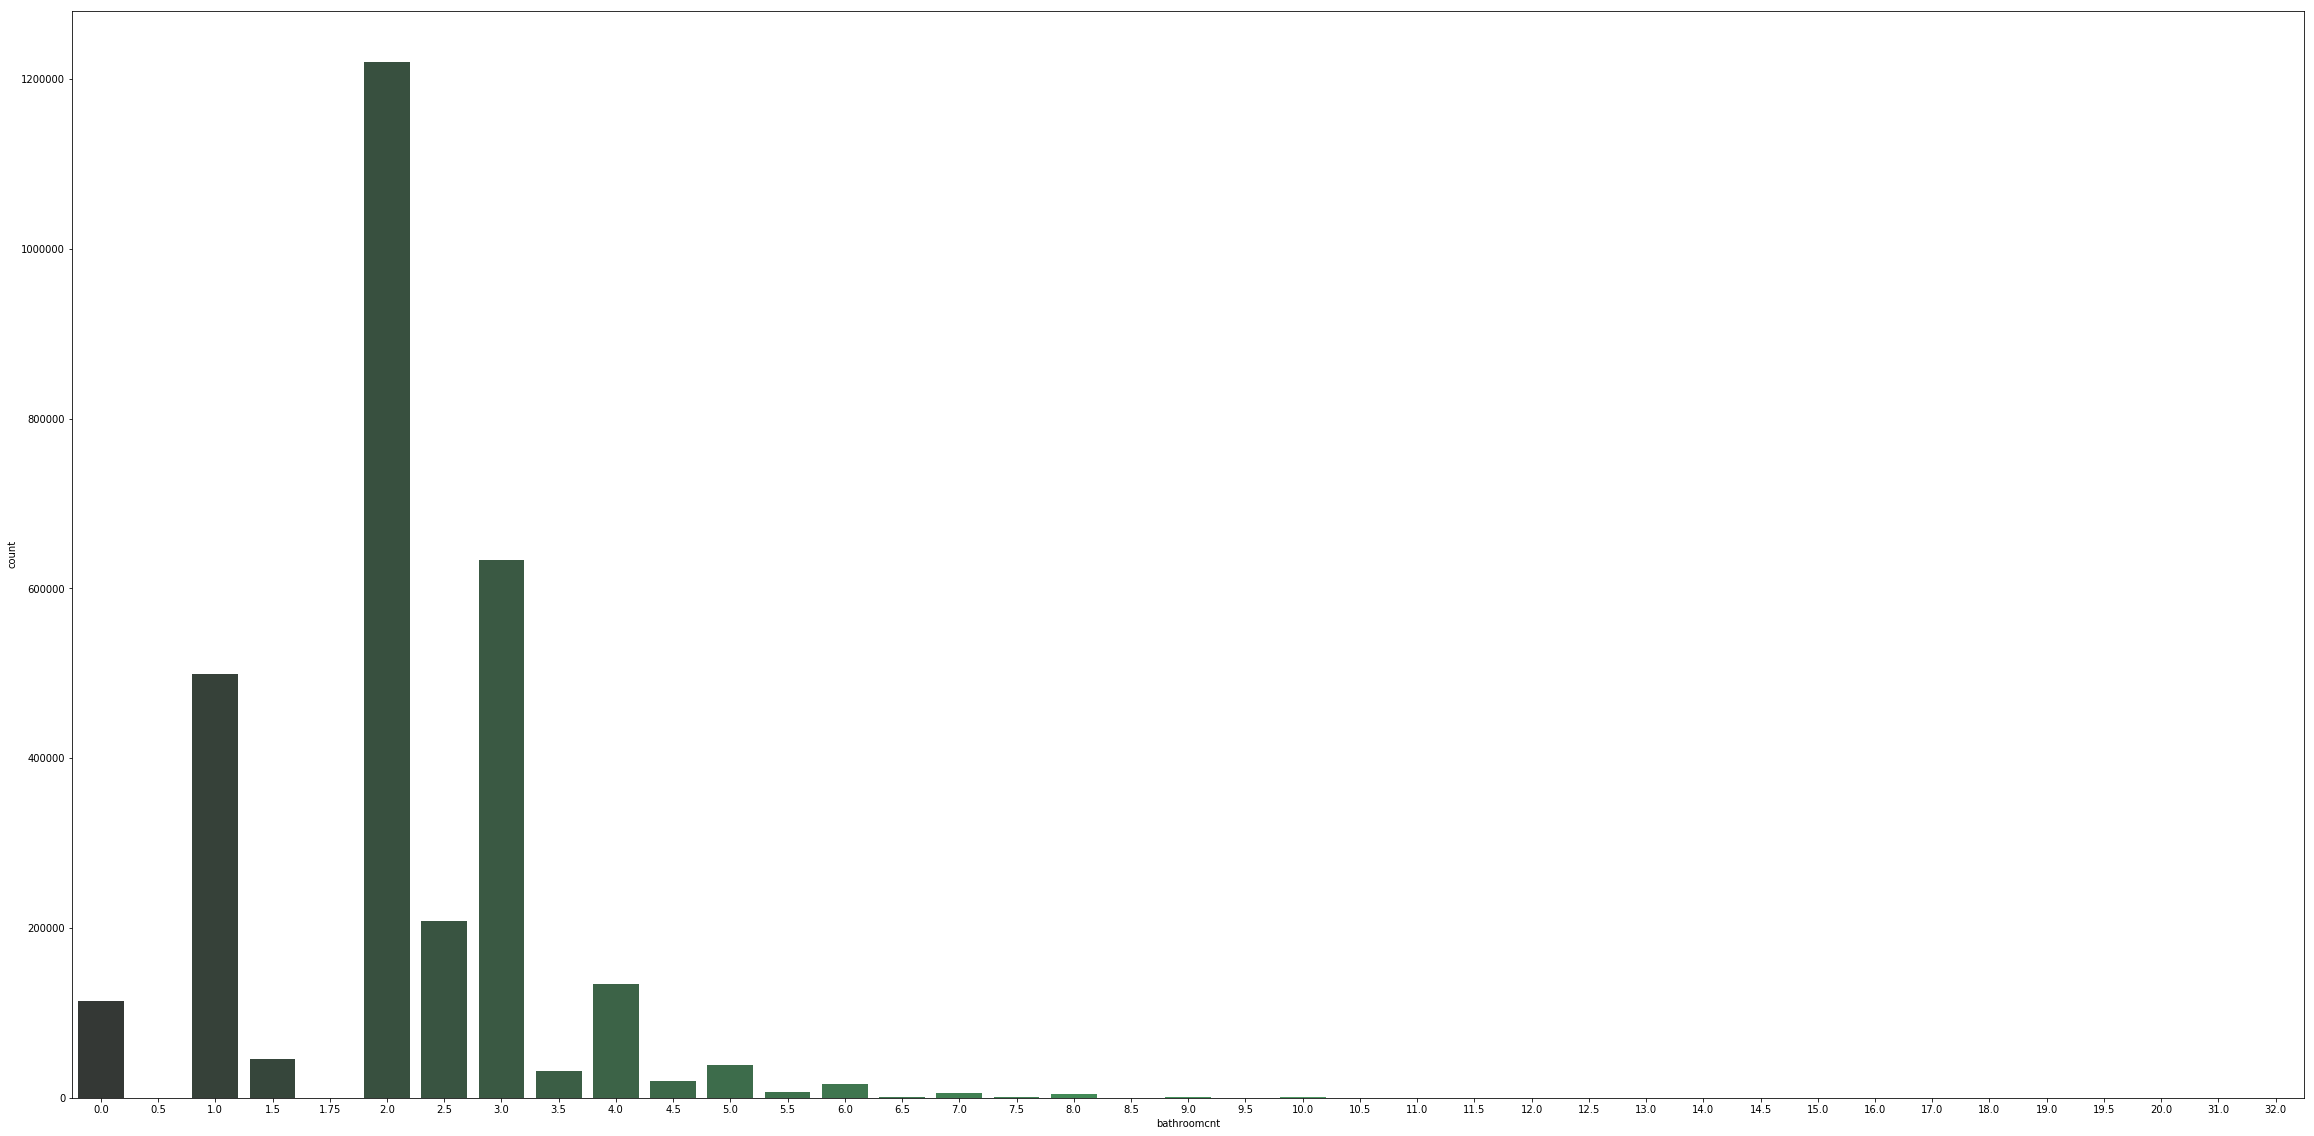

In [13]:
plt.figure(figsize=(40,20))
sns.countplot(x="bathroomcnt", data=project, palette="Greens_d")

In [14]:
totodrop = ['propertycountylandusecode'
          ]

project.drop(totodrop, inplace = True, axis = 1)
project.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34144442.0,-118654084.0,...,3101.0,96337.0,0.0,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34140430.0,-118625364.0,...,3101.0,96337.0,0.0,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,0.0,0.0,NaN,73026.0,NaN,6037.0,NaN,33989359.0,-118394633.0,...,3101.0,96095.0,0.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,10859147,0.0,0.0,NaN,5068.0,NaN,6037.0,NaN,34148863.0,-118437206.0,...,3101.0,96424.0,0.0,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,10879947,0.0,0.0,NaN,1776.0,NaN,6037.0,NaN,34194168.0,-118385816.0,...,3101.0,96450.0,0.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN


In [15]:
project2 = project.fillna(project.mean())

In [21]:
train = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])

In [22]:
train.isnull().sum()

parcelid           0
logerror           0
transactiondate    0
dtype: int64

### We planned to merge 2 datasets mainly because aim of the competition was to improve the log error and for improving the log error we needed to have some parameters from the properties 2017 dataset also which would help us in predicting future log errors.

In [23]:
train1 = pd.merge(train, project2, on='parcelid', how='left')

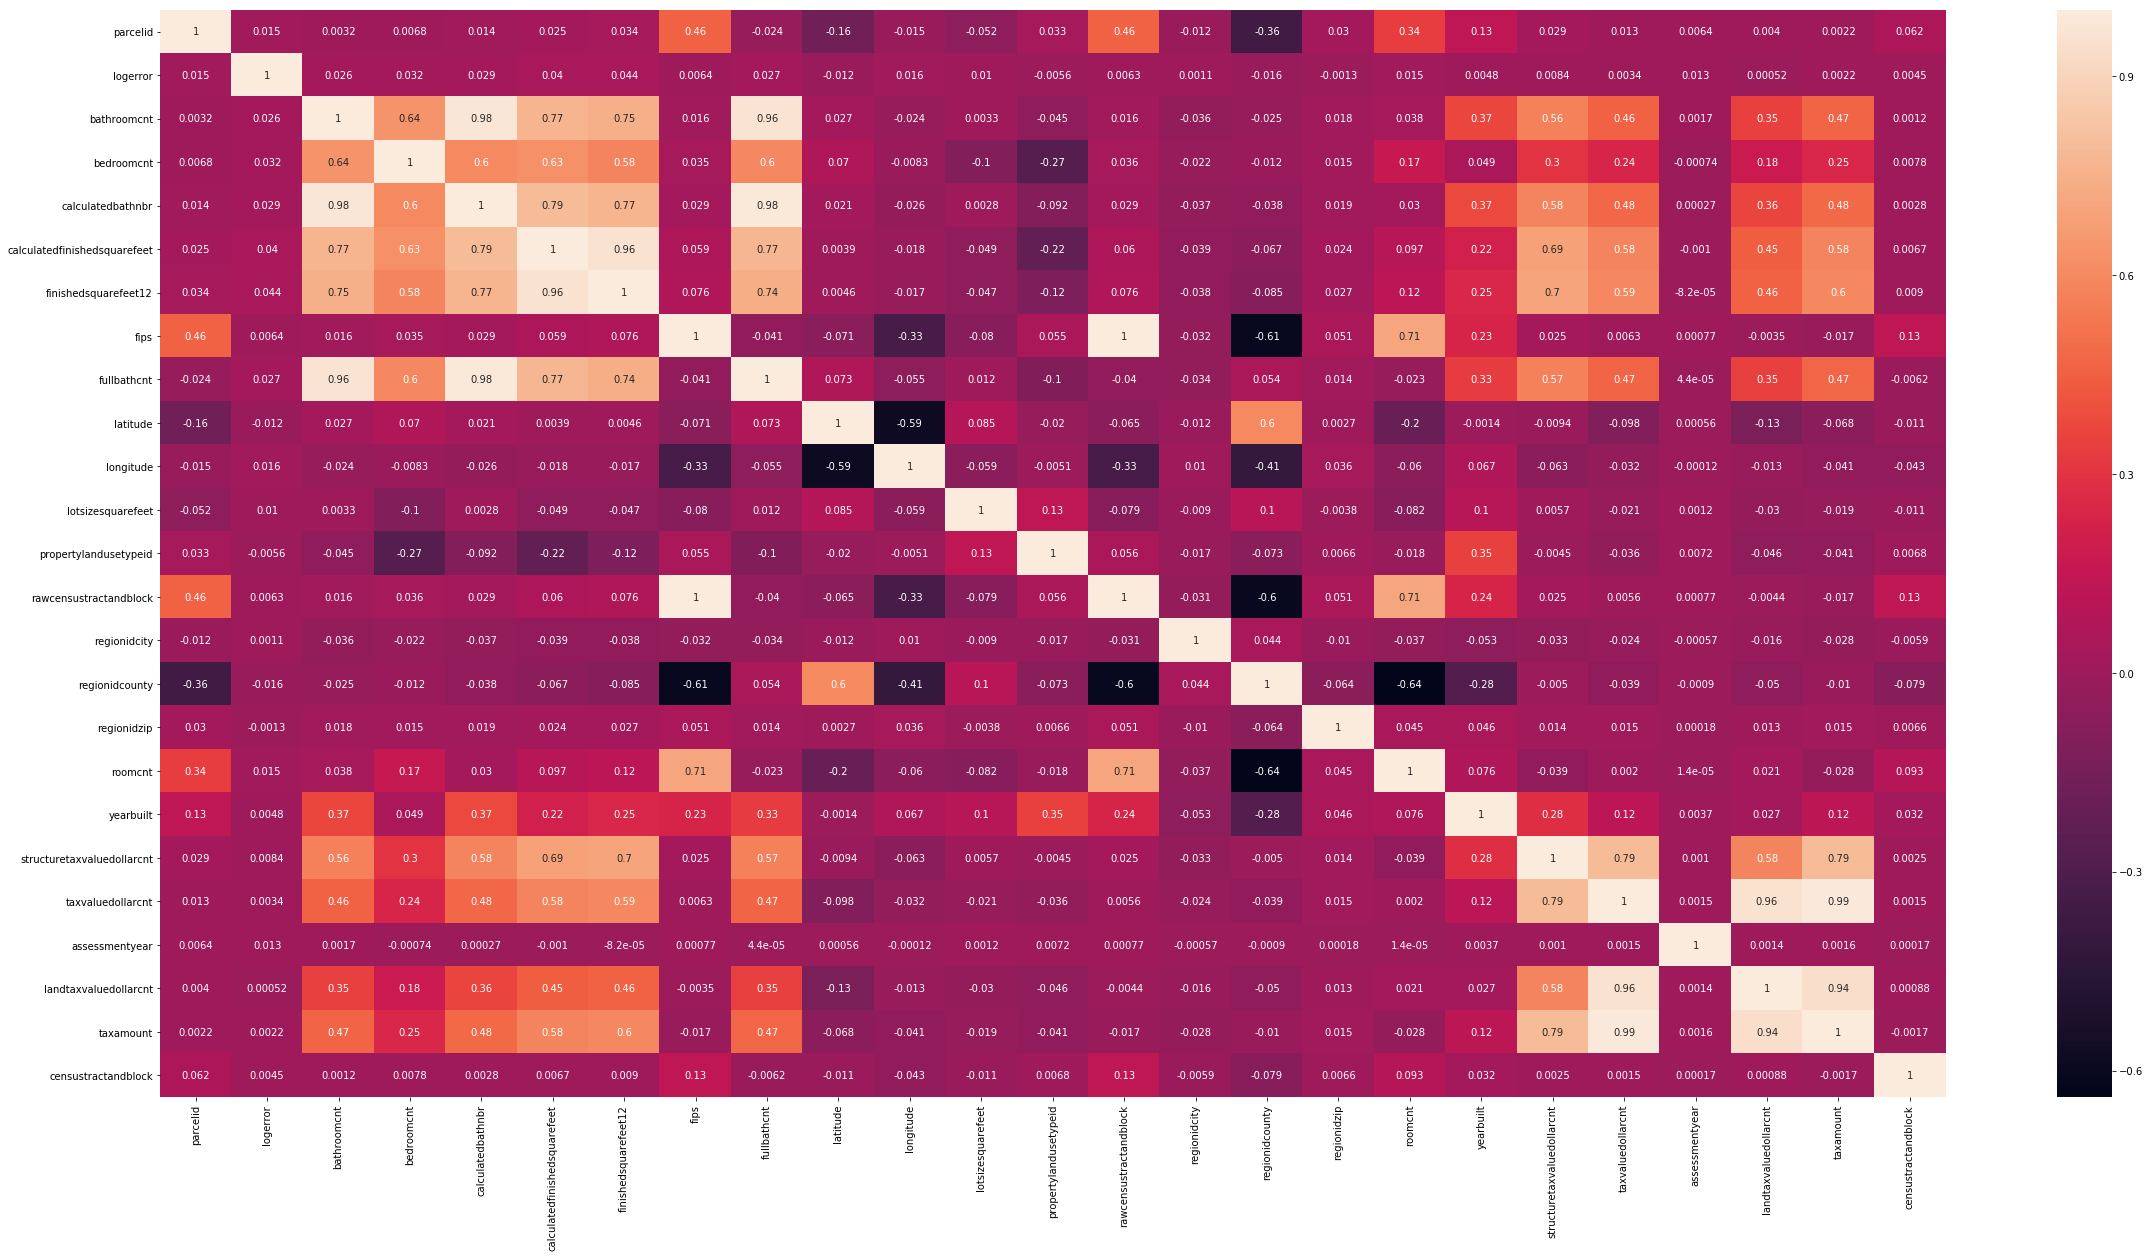

In [25]:
plt.figure(figsize=(40,20))
sns.heatmap(train1.corr(),annot=True)

## Linear Regression

In [29]:
from collections import Counter
import random
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

In [30]:
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy import stats
from __future__ import print_function

C:\Users\ophan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Divided the train and test data taking log error into consideration

In [31]:
X=train1.drop(['parcelid','transactiondate','logerror'],axis=1)
y=train1['logerror']

In [32]:
from sklearn.cross_validation import train_test_split

C:\Users\ophan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
logmodel = LinearRegression()

### We are here fitting the model into X_train and y_train

In [36]:
logmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
print(logmodel.intercept_)

0.12848508890281754


In [38]:
logmodel.coef_

array([-1.98568207e-02,  2.43203898e-03,  1.64898790e-02, -3.23947301e-06,
        1.85093152e-05, -6.44261513e-04,  2.26623134e-03, -4.76225618e-09,
        8.29402294e-09,  2.43283122e-08,  4.25404267e-04,  8.05261580e-08,
       -2.71558276e-09,  1.02270978e-06,  1.08005761e-07, -6.07896587e-04,
       -5.93674980e-05, -2.30622434e-07,  1.88471264e-07, -3.31096892e-08,
       -1.89257521e-07,  1.75506322e-07,  4.15032592e-16])

In [39]:
X_train.columns

Index([u'bathroomcnt', u'bedroomcnt', u'calculatedbathnbr',
       u'calculatedfinishedsquarefeet', u'finishedsquarefeet12', u'fips',
       u'fullbathcnt', u'latitude', u'longitude', u'lotsizesquarefeet',
       u'propertylandusetypeid', u'rawcensustractandblock', u'regionidcity',
       u'regionidcounty', u'regionidzip', u'roomcnt', u'yearbuilt',
       u'structuretaxvaluedollarcnt', u'taxvaluedollarcnt', u'assessmentyear',
       u'landtaxvaluedollarcnt', u'taxamount', u'censustractandblock'],
      dtype='object')

In [40]:
pd.DataFrame(logmodel.coef_,X.columns,columns=['Coeff'])

,Coeff
bathroomcnt,-1.985682e-02
bedroomcnt,2.432039e-03
calculatedbathnbr,1.648988e-02
calculatedfinishedsquarefeet,-3.239473e-06
finishedsquarefeet12,1.850932e-05
fips,-6.442615e-04
fullbathcnt,2.266231e-03
latitude,-4.762256e-09
longitude,8.294023e-09
lotsizesquarefeet,2.432831e-08


In [41]:
predictions = logmodel.predict(X_test)

In [42]:
predictions

array([0.00710959, 0.01507485, 0.01746808, ..., 0.05145291, 0.0153326 ,
       0.01358898])

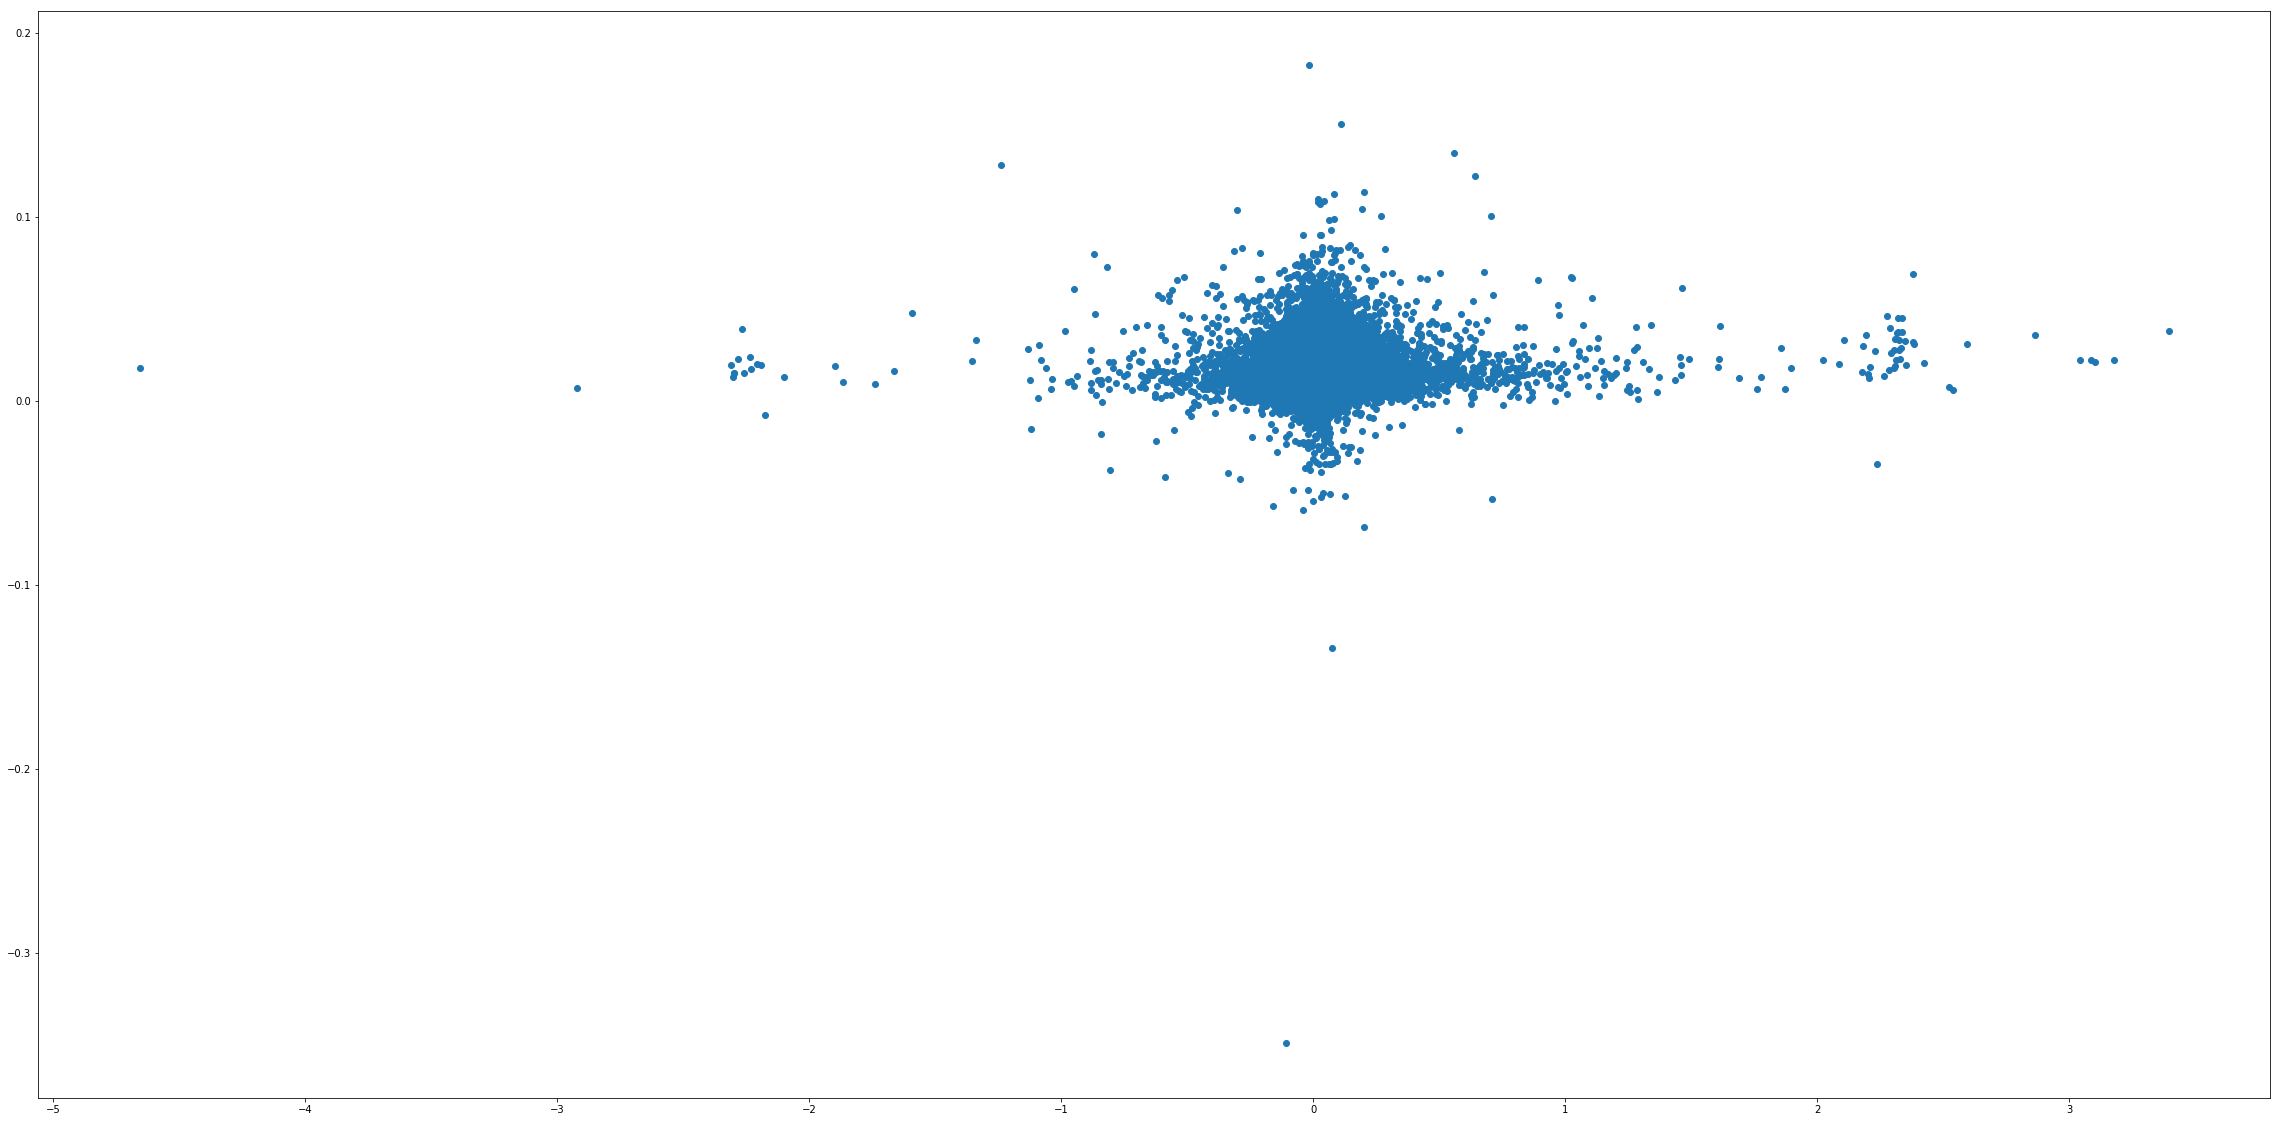

In [43]:
%matplotlib inline
plt.figure(figsize=(40,20))
plt.scatter(y_test,predictions)

In [46]:
dfr = pd.DataFrame({'y_test': y_test,'predictions': predictions})
dfr

,predictions,y_test
77097,0.007110,0.052601
20930,0.015075,-0.039471
11807,0.017468,0.074354
24835,0.041061,-0.060827
71879,0.016399,-0.068134
13806,0.039936,-0.045699
56096,0.009006,-0.075757
40351,0.036051,0.035525
47827,0.010003,0.030420
24966,0.021463,0.009441


In [54]:
from sklearn import metrics

#### So as per the above analysis our model has scored 0. So there is no point to further move ahead with this dataset as it makes no sense in the predictions of logerror

In [49]:
print('Variance score: %.2f' % logmodel.score(X_test, y_test))

Variance score: 0.00


In [50]:
logmodel.score(X, y)

0.00359684702412777

In [57]:
# Mean Squared Error
print(metrics.mean_squared_error(y_test, predictions))

0.02892433320732127


In [56]:
# Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.1700715531984149


###  What metrics can we used for regression problems?

#### Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

#### 1n∑i=1n|yi−y^i|
 
#### Mean Squared Error (MSE) is the mean of the squared errors:

#### 1n∑i=1n(yi−y^i)2
 
#### Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

#### 1n∑i=1n(yi−y^i)2−−−−−−−−−−−−√

## XGBOOST,LightGBM, OLS

### Importing all the importing libraries which will be used for performing analysis using XGBOOST, LightGBM and OLS

In [1]:
# imports 
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc

In [3]:
from sklearn.linear_model import LinearRegression
import random
import datetime as dt

### Parameters

In [4]:
XGB_WEIGHT = 0.6415
BASELINE_WEIGHT = 0.0056
OLS_WEIGHT = 0.0828

XGB1_WEIGHT = 0.8083  # Weight of first in combination of two XGB models

BASELINE_PRED = 0.0115   # Baseline based on mean of training data, per Oleg

### Reading data from CSV

In [5]:
print( "\nReading data from disk ...")
prop = pd.read_csv('properties_2017.csv',low_memory = False)
train = pd.read_csv("train_2017.csv")


Reading data from disk ...


## What is Light GBM?
 Light GBM is a gradient boosting framework that uses tree based learning algorithm.

## How it differs from other tree based algorithm?
 Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

## Below diagrams explain the implementation of LightGBM and other boosting algorithms

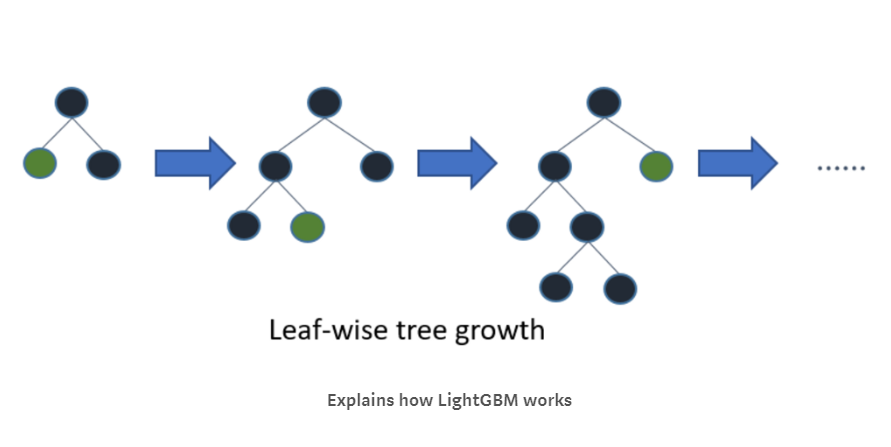

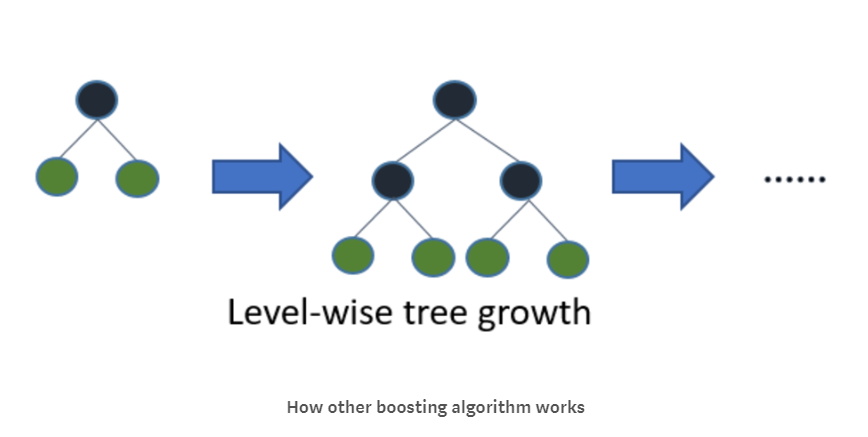

## What are its Advantages?

 LightGBM as we already know is a gradient boosting framework that makes the use of **tree-based learning algorithms**. It is designed with the following **advantages** in order to be distributed as well as efficient:

 **Higher efficiency as well as faster training speed**

 **Usage of lower memory**

 **Better accuracy**

 **Supports Parallel and GPU learning**

 **Data of large-scale can be handled**
 
## Can we use Light GBM everywhere?

No, it is **not advisable to use LGBM on small datasets**. Light GBM is **sensitive** to overfitting and can easily overfit small data. Their is no threshold on the number of rows but my experience suggests me to use it only for data with **10,000+ rows**. 

##### This was one of the main reasons why we planned to use LightGBM on our project data


In the below code I have **merged** both the properties and train data sets with the help of the join key named ParcelId, filled the null values with the median values and also processed the data for LightGBM and dropped some irrelevant columns

## PROCESS DATA FOR LIGHTGBM

In [6]:
print( "\nProcessing data for LightGBM ..." )
for c, dtype in zip(prop.columns, prop.dtypes):
    if dtype == np.float64:
        prop[c] = prop[c].astype(np.float32)

df_train = train.merge(prop, how='left', on='parcelid')
df_train.fillna(df_train.median(),inplace = True)

x_train = df_train.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 
                         'propertycountylandusecode', 'fireplacecnt', 'fireplaceflag'], axis=1)


Processing data for LightGBM ...


#### Code below gives the shape of an array along x_train and y_train

In [7]:
y_train = df_train['logerror'].values
print(x_train.shape, y_train.shape)


train_columns = x_train.columns

for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)

del df_train; gc.collect()

x_train = x_train.values.astype(np.float32, copy=False)
d_train = lgb.Dataset(x_train, label=y_train)

((77613, 53), (77613L,))


### Initializing Parameters

Description of the parameters of LightGBM :

##### RUN LIGHTGBM

In [8]:
params = {}
params['max_bin'] = 10
params['learning_rate'] = 0.0021 # shrinkage_rate
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'l1'          # or 'mae'
params['sub_feature'] = 0.345    
params['bagging_fraction'] = 0.85 # sub_row
# Note: To enable bagging, bagging_freq should be set to a non zero value as well
params['bagging_freq'] = 40 #after every 40 iterations bagging will be performed
params['num_leaves'] = 512        # num_leaf
params['min_data'] = 500         # min_data_in_leaf
params['min_hessian'] = 0.05     # min_sum_hessian_in_leaf
params['verbose'] = 0
params['feature_fraction_seed'] = 2
params['bagging_seed'] = 3

In [9]:
print("\nFitting LightGBM model ...")
clf = lgb.train(params, d_train, 430)

del d_train; gc.collect()
del x_train; gc.collect()


Fitting LightGBM model ...


0

In [10]:
print("\nPrepare for LightGBM prediction ...")
print("   Read sample file ...")
sample = pd.read_csv('sample_submission.csv')
print("   ...")


Prepare for LightGBM prediction ...
   Read sample file ...
   ...


In [11]:
sample['parcelid'] = sample['ParcelId']
print("   Merge with property data ...")
df_test = sample.merge(prop, on='parcelid', how='left')
print("   ...")
del sample, prop; gc.collect()
print("   ...")

   Merge with property data ...
   ...
   ...


In [12]:
x_test = df_test[train_columns]
print("   ...")
del df_test; gc.collect()
print("   Preparing x_test...")
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)
print("   ...")
x_test = x_test.values.astype(np.float32, copy=False)
print("Test shape :", x_test.shape)

   ...
   Preparing x_test...
   ...
('Test shape :', (2985217L, 53L))


In [13]:
print("\nStart LightGBM prediction ...")
p_test = clf.predict(x_test)

del x_test; gc.collect()

print( "\nUnadjusted LightGBM predictions:" )
print( pd.DataFrame(p_test).head() )


Start LightGBM prediction ...

Unadjusted LightGBM predictions:
          0
0  0.035861
1  0.036083
2  0.015616
3  0.017465
4  0.017544


## XGBoost ##

 **XGBoost** is an open-source software library which provides the gradient boosting framework for C++, Java, Python, R, and Julia. It works on Linux, Windows, and macOS.
 
 **XGBoost** is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or    tabular data.

 **XGBoost** is an implementation of gradient boosted decision trees designed for speed and performance.

##### RE-READ PROPERTIES FILE

In [14]:
print( "\nRe-reading properties file ...")
properties = pd.read_csv('properties_2017.csv')


Re-reading properties file ...


C:\Users\ophan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### PROCESS DATA FOR XGBOOST

LabelEncoder can be used to normalize labels.
It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels

**fit(y)** : To Fit label encoder

**inverse_transform(y)** : To Transform labels back to original encoding

In [15]:
print( "\nProcessing data for XGBoost ...")
for c in properties.columns:
    properties[c]=properties[c].fillna(-1)
    if properties[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(properties[c].values))
        properties[c] = lbl.transform(list(properties[c].values))

train_df = train.merge(properties, how='left', on='parcelid')
x_train = train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
x_test = properties.drop(['parcelid'], axis=1)
# shape        
print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))


Processing data for XGBoost ...
Shape train: (77613, 57)
Shape test: (2985217, 57)


### Dropping out ouliers

In [16]:
train_df=train_df[ train_df.logerror > -0.4 ]
train_df=train_df[ train_df.logerror < 0.419 ]
x_train=train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
y_train = train_df["logerror"].values.astype(np.float32)
y_mean = np.mean(y_train)

print('After removing outliers:')     
print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))

After removing outliers:
Shape train: (75949, 57)
Shape test: (2985217, 57)


##### RUN XGBOOST

In [17]:
print("\nSetting up data for XGBoost ...")
# xgboost params
xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4, 
    'base_score': y_mean,
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

num_boost_rounds = 250
print("num_boost_rounds="+str(num_boost_rounds))


Setting up data for XGBoost ...
num_boost_rounds=250


In [18]:
# train model
print( "\nTraining XGBoost ...")
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

print( "\nPredicting with XGBoost ...")
xgb_pred1 = model.predict(dtest)

print( "\nFirst XGBoost predictions:" )
print( pd.DataFrame(xgb_pred1).head() )


Training XGBoost ...

Predicting with XGBoost ...

First XGBoost predictions:
          0
0  0.076013
1  0.056619
2 -0.064734
3  0.003192
4  0.001247


##### RUN XGBOOST AGAIN

In [19]:
print("\nSetting up data for XGBoost ...")
# xgboost params
xgb_params = {
    'eta': 0.033,
    'max_depth': 6,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'base_score': y_mean,
    'silent': 1
}

num_boost_rounds = 150
print("num_boost_rounds="+str(num_boost_rounds))


Setting up data for XGBoost ...
num_boost_rounds=150


In [20]:
print( "\nTraining XGBoost again ...")
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

print( "\nPredicting with XGBoost again ...")
xgb_pred2 = model.predict(dtest)

print( "\nSecond XGBoost predictions:" )
print( pd.DataFrame(xgb_pred2).head() )


Training XGBoost again ...

Predicting with XGBoost again ...

Second XGBoost predictions:
          0
0  0.070272
1  0.053413
2 -0.100315
3 -0.003527
4 -0.000545


##### COMBINE XGBOOST RESULTS

In [21]:
xgb_pred = XGB1_WEIGHT*xgb_pred1 + (1-XGB1_WEIGHT)*xgb_pred2
#xgb_pred = xgb_pred1

print( "\nCombined XGBoost predictions:" )
print( pd.DataFrame(xgb_pred).head() )

del train_df
del x_train
del x_test
del properties
del dtest
del dtrain
del xgb_pred1
del xgb_pred2 
gc.collect()


Combined XGBoost predictions:
          0
0  0.074913
1  0.056004
2 -0.071555
3  0.001904
4  0.000904


128

##    OLS     ##

In [23]:
np.random.seed(17)
random.seed(17)

train = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])
properties = pd.read_csv("properties_2017.csv")
submission = pd.read_csv("sample_submission.csv")
print(len(train),len(properties),len(submission))

def get_features(df):
    df["transactiondate"] = pd.to_datetime(df["transactiondate"])
    df["transactiondate_year"] = df["transactiondate"].dt.year
    df["transactiondate_month"] = df["transactiondate"].dt.month
    df['transactiondate'] = df['transactiondate'].dt.quarter
    df = df.fillna(-1.0)
    return df

def MAE(y, ypred):
    #logerror=log(Zestimate)−log(SalePrice)
    return np.sum([abs(y[i]-ypred[i]) for i in range(len(y))]) / len(y)

train = pd.merge(train, properties, how='left', on='parcelid')
y = train['logerror'].values
test = pd.merge(submission, properties, how='left', left_on='ParcelId', right_on='parcelid')
properties = [] #memory

exc = [train.columns[c] for c in range(len(train.columns)) if train.dtypes[c] == 'O'] + ['logerror','parcelid']
col = [c for c in train.columns if c not in exc]

train = get_features(train[col])
test['transactiondate'] = '2017-01-01' #should use the most common training date
test = get_features(test[col])

reg = LinearRegression(n_jobs=-1)
reg.fit(train, y); print('fit...')
print(MAE(y, reg.predict(train)))
train = [];  y = [] #memory

test_dates = ['2016-10-01','2016-11-01','2016-12-01','2017-10-01','2017-11-01','2017-12-01']
test_columns = ['201610','201611','201612','201710','201811','201812']

(77613, 2985217, 2985217)


C:\Users\ophan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ophan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\ophan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

fit...
0.07095920965906971


##  Combine and Save  ##
##### COMBINE PREDICTIONS

In [24]:
print( "\nCombining XGBoost, LightGBM, and baseline predicitons ..." )
lgb_weight = (1 - XGB_WEIGHT - BASELINE_WEIGHT) / (1 - OLS_WEIGHT)
xgb_weight0 = XGB_WEIGHT / (1 - OLS_WEIGHT)
baseline_weight0 =  BASELINE_WEIGHT / (1 - OLS_WEIGHT)
pred0 = xgb_weight0*xgb_pred + baseline_weight0*BASELINE_PRED + lgb_weight*p_test


Combining XGBoost, LightGBM, and baseline predicitons ...


In [25]:
print( "\nCombined XGB/LGB/baseline predictions:" )
print( pd.DataFrame(pred0).head() )


Combined XGB/LGB/baseline predictions:
          0
0  0.066263
1  0.053124
2 -0.043968
3  0.008122
4  0.007453


In [26]:
print( "\nPredicting with OLS and combining with XGB/LGB/baseline predicitons: ..." )
for i in range(len(test_dates)):
    test['transactiondate'] = test_dates[i]
    pred = OLS_WEIGHT*reg.predict(get_features(test)) + (1-OLS_WEIGHT)*pred0
    submission[test_columns[i]] = [float(format(x, '.4f')) for x in pred]
    print('predict...', i)


Predicting with OLS and combining with XGB/LGB/baseline predicitons: ...
('predict...', 0)
('predict...', 1)
('predict...', 2)
('predict...', 3)
('predict...', 4)
('predict...', 5)


In [27]:
print( "\nCombined XGB/LGB/baseline/OLS predictions:" )
print( submission.head() )


Combined XGB/LGB/baseline/OLS predictions:
   ParcelId  201610  201611  201612  201710  201711  201712
0  10754147  0.0669  0.0669  0.0669  0.0669  0.0669  0.0669
1  10759547  0.0544  0.0544  0.0544  0.0544  0.0544  0.0544
2  10843547 -0.0116 -0.0115 -0.0115 -0.0116 -0.0115 -0.0115
3  10859147  0.0112  0.0113  0.0113  0.0112  0.0113  0.0113
4  10879947  0.0126  0.0126  0.0126  0.0126  0.0126  0.0126


##### WRITE THE RESULTS

In [28]:
from datetime import datetime
print( "\nWriting results to disk ..." )
submission.to_csv('sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)
print( "\nFinished ...")


Writing results to disk ...

Finished ...


### Summary

In this notebook we have performed Linear Regression and XGBoost and LightGBM in order to predict the future log error . In Linear we have received a **very low variance score(= 0)** which made us think that Linear Regression model does not fit out dataset and we need to think about implementing some other methods for predicting and increasing the accuracy of the log error in the future. So, we decided to use LightGBM and XGBoost in order to predict the log error values in **Q4 of 2017**.

# References and Licenses :

In this notebook for Zillow Home Value Prediction we have taken some inputs from some of the kernels for XGBoost and LightGBM.

https://media.readthedocs.org/pdf/lightgbm/latest/lightgbm.pdf

https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

https://www.techleer.com/articles/489-lightgbm-a-light-gradient-boosting-machine/

https://www.statisticallysignificantconsulting.com/RegressionAnalysis.htm

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

https://www.kaggle.com/davidfumo/boosted-trees-lb-0-0643707/code

Also wanted to give credits to **Pushkar Mandot** whose **Open Source Medium Blog** helped us understand what **LightGBM** is and where it can be applied

https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc